In [1]:
import os
import sys
import pandas as pd
import numpy as np
import datetime
from matplotlib import pyplot as plt
import seaborn as sns
from IPython.display import display, Markdown

plt.rcParams.update({'figure.max_open_warning': 0})

In [2]:
# Функции для отрисовки графиков
base_context = 'seaborn-white'


def fast_bar(data, figsize=(6, 4), title='', alpha=1, label='', new_figure=True):
    with plt.style.context(base_context):
        if new_figure:
            plt.figure(figsize=figsize)
        plt.bar(data.index, data, alpha=alpha, label=label)
        plt.title(title)


def fast_hist(data, n=30, ax=None, figsize=(12, 4), title='', alpha=1, label='', new_figure=True):
    with plt.style.context(base_context):
        if new_figure:
            plt.figure(figsize=figsize)
        data.hist(bins=n, ax=ax, figsize=figsize, alpha=alpha, label=label)
        plt.title(title)

def fast_plot(data, rolling=1, alpha=0.5, figsize=(12, 4), new_figure=True, title=None, label=None):
    data = data.rolling(rolling).mean()
    with plt.style.context(base_context):
        if new_figure:
            plt.figure(figsize=figsize)
        plt.scatter(data.index, data, alpha=alpha)
        plt.plot(data.index, data, linewidth=2, label=label)
        if title is not None:
            plt.title(title);

def fast_scatter(x, y, rolling=1, alpha=0.5, figsize=(12, 4), new_figure=True, title=None, label=None):
    x = x.rolling(rolling).mean()
    y = y.rolling(rolling).mean()
    with plt.style.context(base_context):
        if new_figure:
            plt.figure(figsize=figsize)
        plt.scatter(x, y, alpha=alpha, label=label)
        if title is not None:
            plt.title(title);


def fast_legend(ncol=3, pos=(0.5, -0.15), fontsize=16):
    return plt.legend(loc='upper center', ncol=ncol, bbox_to_anchor=pos, fontsize=fontsize)

In [3]:
all_files = []
for root, dirs, files in os.walk(os.path.abspath('')):
    for file in files:
        if file.endswith(".csv"):
             all_files.append(f'{root}/{file}')

print("Список файлов:")
all_files.sort()
print(all_files)

Список файлов:
['/Users/vladimir/Desktop/diploma/test/BTC-USD.csv', '/Users/vladimir/Desktop/diploma/test/ETH-USD.csv']


In [4]:
eth_usd = pd.read_csv(all_files[1], index_col=0, parse_dates=True)
display(eth_usd.describe().T)
print('Размер датасета: ', eth_usd.shape)

,count,mean,std,min,25%,50%,75%,max
Open,366.0,2.081738e+03,8.398465e+02,9.934006e+02,1.321171e+03,1.768653e+03,2.859366e+03,4.111345e+03
High,366.0,2.134445e+03,8.541443e+02,1.073053e+03,1.340168e+03,1.791865e+03,2.948665e+03,4.149027e+03
Low,366.0,2.018056e+03,8.201010e+02,8.961090e+02,1.284319e+03,1.697851e+03,2.778169e+03,4.033492e+03
Close,366.0,2.074290e+03,8.355046e+02,9.936368e+02,1.318632e+03,1.745098e+03,2.851675e+03,4.108016e+03
Adj Close,366.0,2.074290e+03,8.355046e+02,9.936368e+02,1.318632e+03,1.745098e+03,2.851675e+03,4.108016e+03
Volume,366.0,1.562360e+10,6.587578e+09,3.282500e+09,1.124689e+10,1.528721e+10,1.855443e+10,4.574340e+10


Размер датасета:  (366, 6)


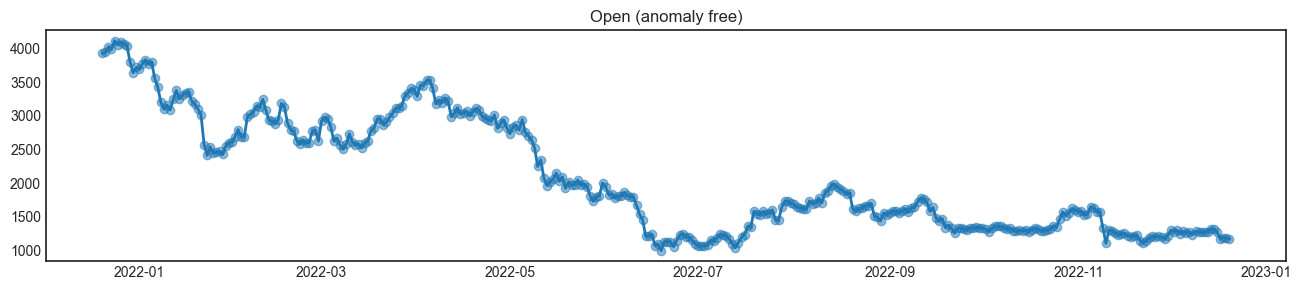

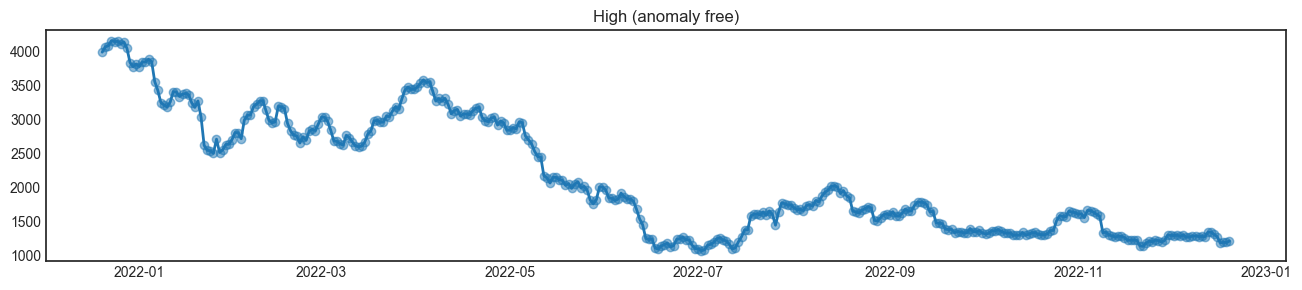

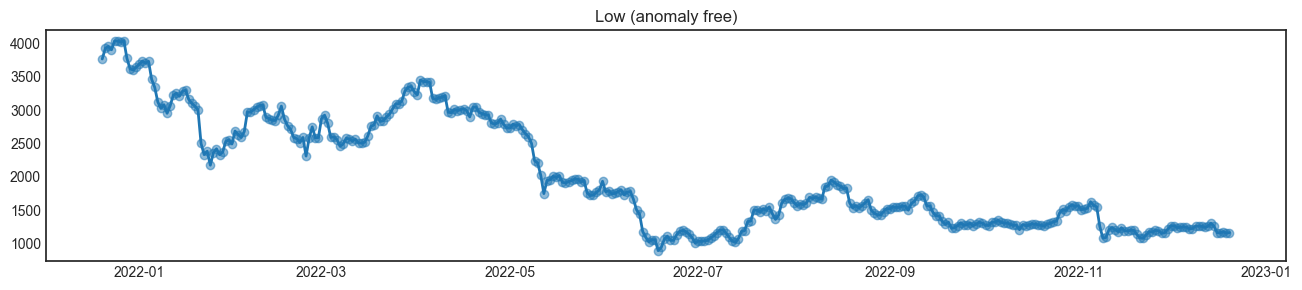

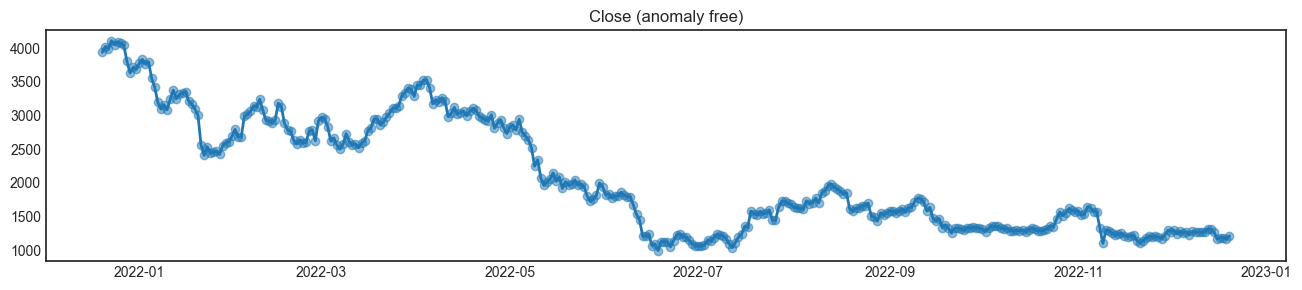

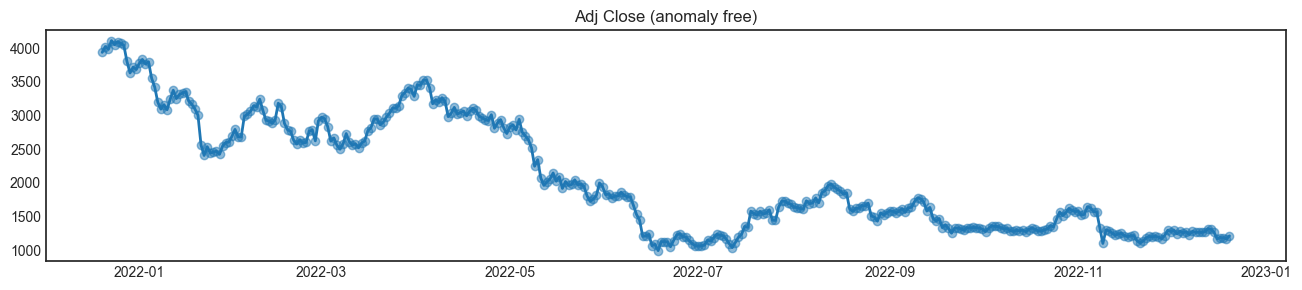

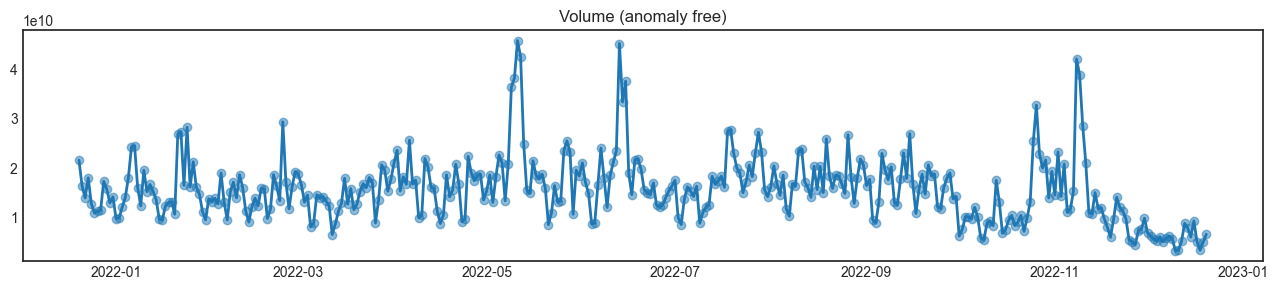

In [5]:
for column in eth_usd.columns:
    fast_plot(eth_usd[column], title=column + ' (anomaly free)', figsize=(16, 3))
    plt.show()

Данные в датасете "eth_usd"

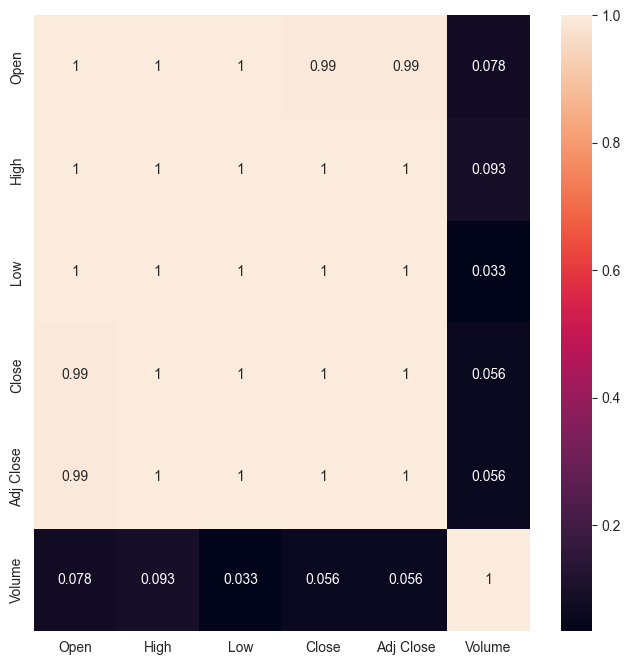

In [6]:
plt.figure(figsize=(8, 8))
display(Markdown('Данные в датасете "eth_usd"'))
sns.heatmap(eth_usd.corr(), annot = True, fmt='.2g');
plt.show()

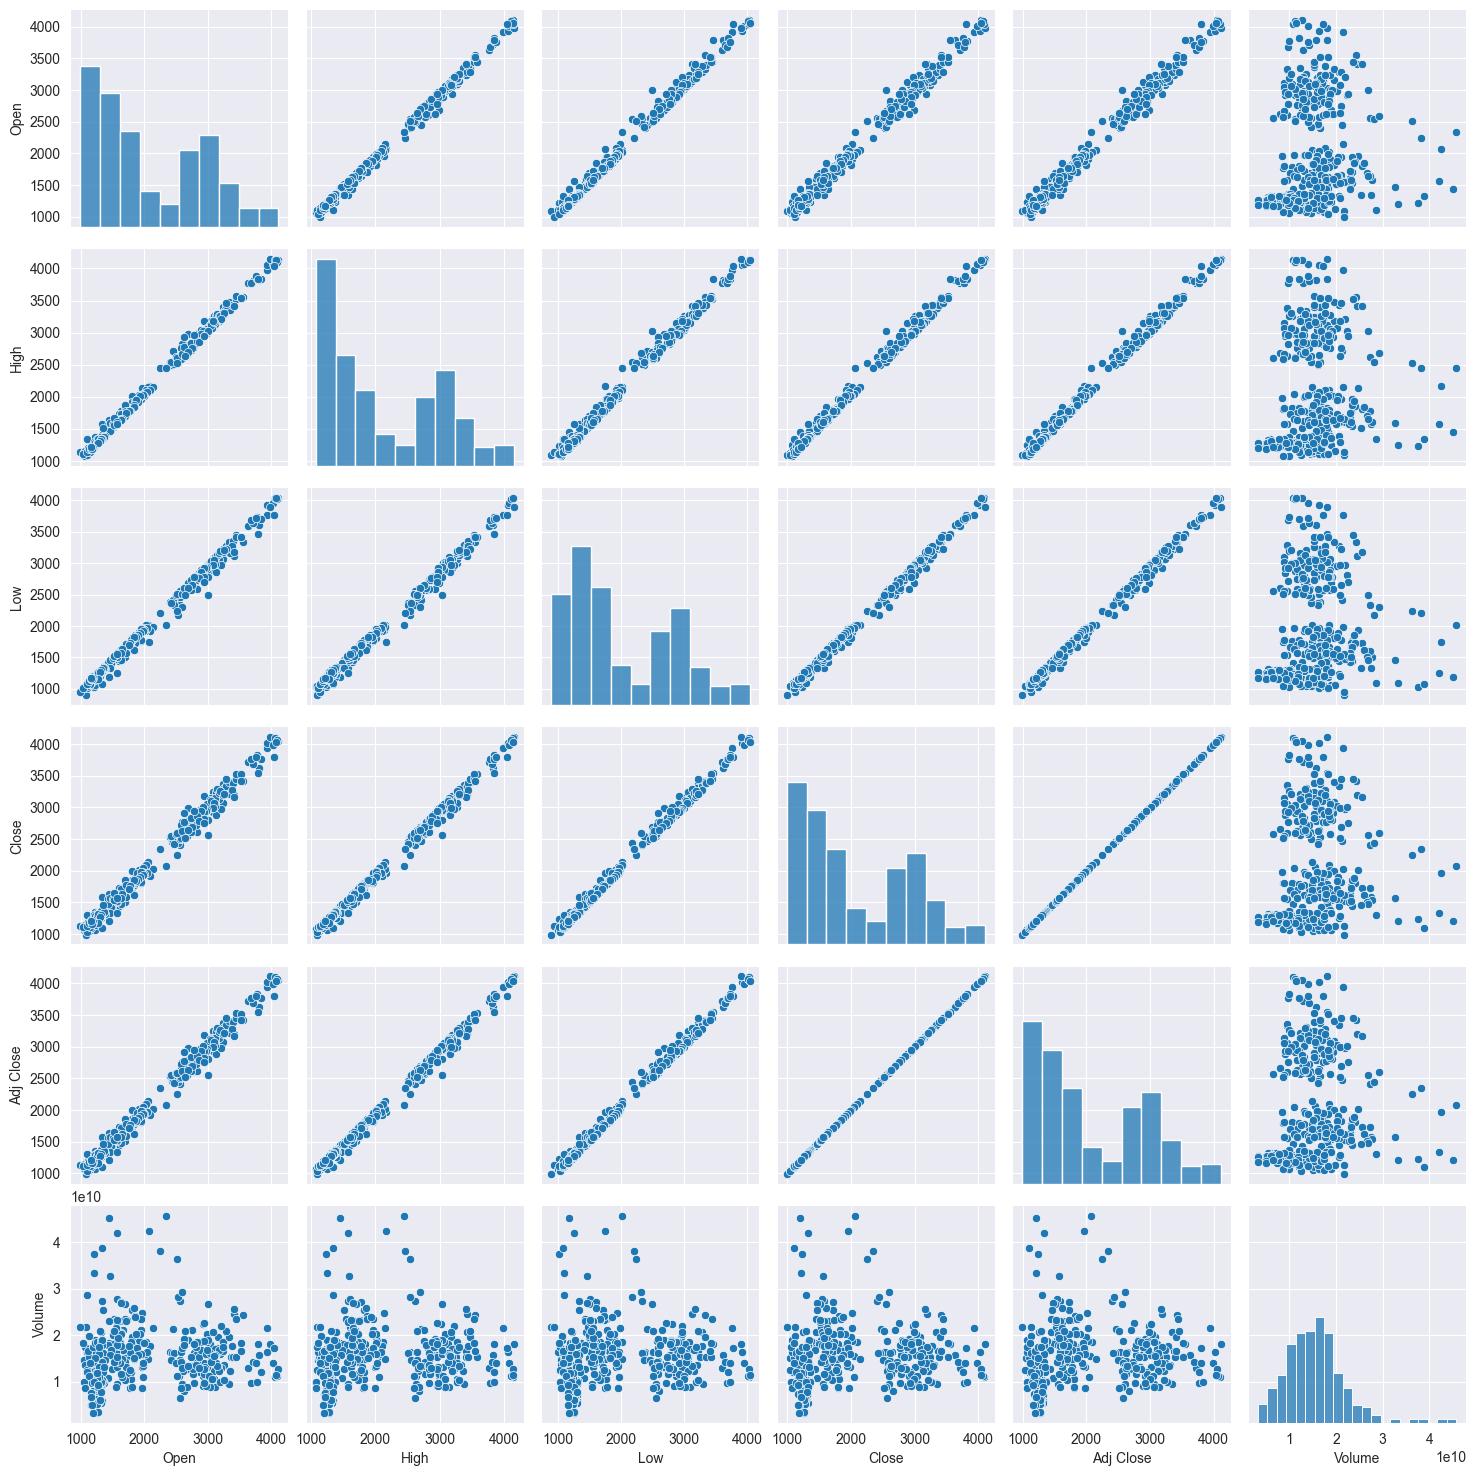

In [7]:
features = eth_usd.columns
sns.pairplot(eth_usd[features]);
plt.show()

## Все фичи скореллированны поэтому надо искать нужные фичи для повторного анализа